<a href="https://colab.research.google.com/github/RishikaB-05/Exploratory-Data-Analysis-on-Haberman-s-Survival-Dataset/blob/main/EDA_(Haberman_Survival_Dataset)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DATA LOADING***





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

***DATA READING***

In [ ]:
data=pd.read_csv("/content/haberman.csv")
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Attribute Information:***

*Age of patient at time of operation (numerical) Patient's year of operation (year - 1900, numerical) Number of positive axillary nodes detected (numerical) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year*

In [ ]:
data=pd.read_csv("/content/haberman.csv",header=None,names=["Age","Year","Nodes","Survival"])
data.sample(5)

,Age,Year,Nodes,Survival
212,58,58,0,1
51,41,65,0,1
252,63,61,28,1
36,39,67,0,1
246,63,61,0,1


***DATA DIMENSION***

In [ ]:
data.shape

(306, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       306 non-null    int64
 1   Year      306 non-null    int64
 2   Nodes     306 non-null    int64
 3   Survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
data.describe()

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
data.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [ ]:
data.duplicated().sum()

17

In [ ]:
data.corr()["Age"]

Age         1.000000
Year        0.089529
Nodes      -0.063176
Survival    0.067950
Name: Age, dtype: float64

***DATA MANUPULATION***

In [ ]:
data['Survival']=data['Survival'].map({1:"Yes",2:"No"})
data

,Age,Year,Nodes,Survival
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
...,...,...,...,...
301,75,62,1,Yes
302,76,67,0,Yes
303,77,65,3,Yes
304,78,65,1,No


In [ ]:
data['Survival']=data['Survival'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       306 non-null    int64   
 1   Year      306 non-null    int64   
 2   Nodes     306 non-null    int64   
 3   Survival  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


***UNIVARIENT ANALYSIS***

***CATEGORICAL DATA***

<Axes: xlabel='count', ylabel='Survival'>

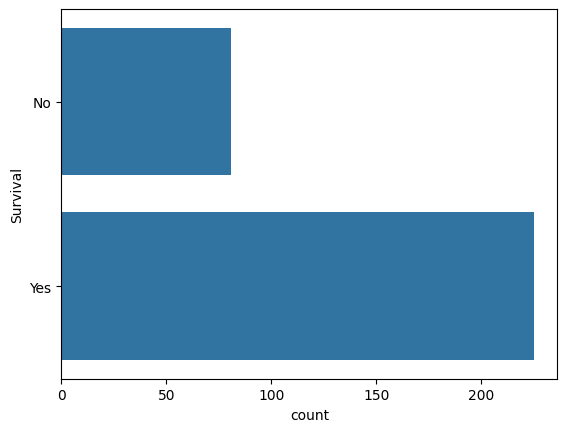

In [ ]:
sns.countplot(data["Survival"]) #countplot is used to get the count (work as bar graph)

<Axes: ylabel='Survival'>

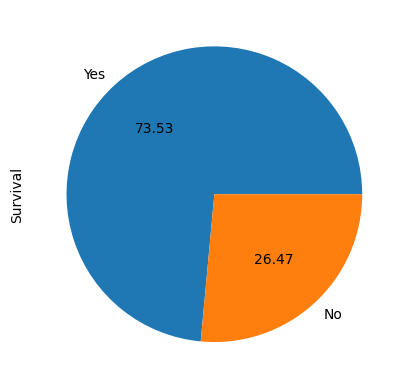

In [ ]:
data["Survival"].value_counts().plot(kind="pie",autopct="%.2f")

***NUMERICAL DATA***

(array([43., 99., 96., 59.,  9.]),
 array([30. , 40.6, 51.2, 61.8, 72.4, 83. ]),
 <BarContainer object of 5 artists>)

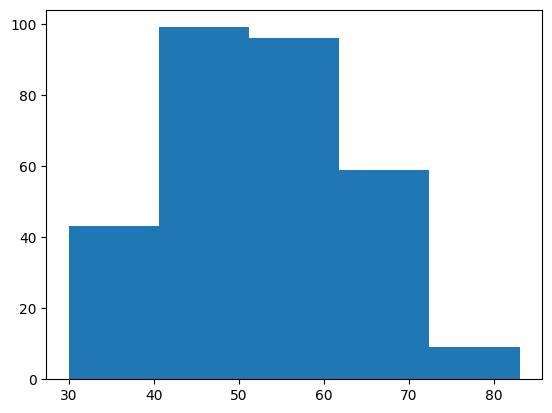

In [ ]:
plt.hist(data["Age"], bins=5)

<ipython-input-16-62ee70f24edc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

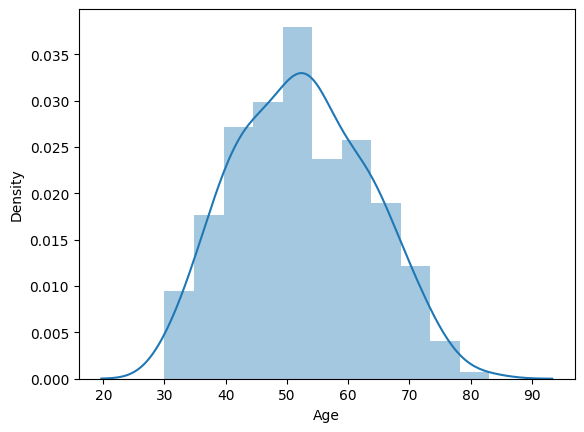

In [ ]:
sns.distplot(data["Age"])

<Axes: ylabel='Nodes'>

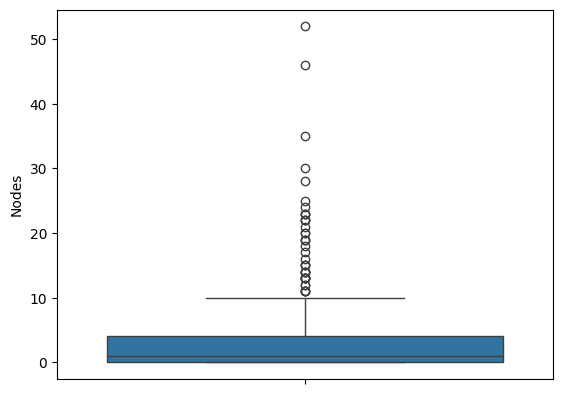

In [ ]:
sns.boxplot(data["Nodes"])

***MULTIVARIENT ANALYSIS***

***NUMERICAL NUMERICAL DATA***




<Axes: xlabel='Age', ylabel='Nodes'>

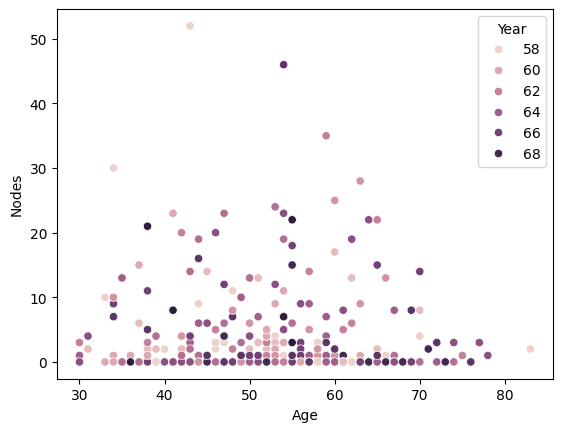

In [ ]:
sns.scatterplot(x="Age",y="Nodes",data=data,hue="Year")

<ipython-input-30-ddd2a4873e04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"],hist=False)
<ipython-input-30-ddd2a4873e04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Nodes"],hist=False)


<Axes: xlabel='Nodes', ylabel='Density'>

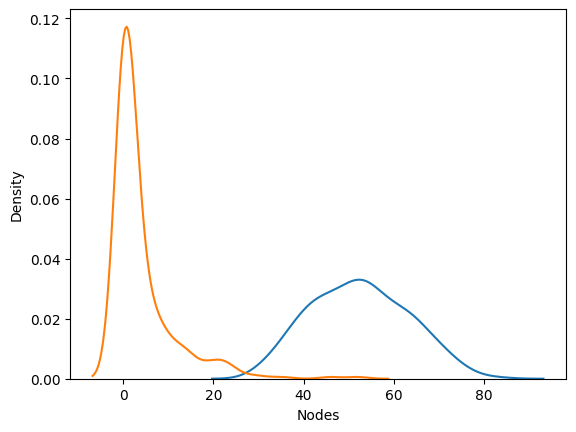

In [ ]:
sns.distplot(data["Age"],hist=False)
sns.distplot(data["Nodes"],hist=False)

***NUMERICAL CATEGORICAL DATA***

<Axes: xlabel='Age', ylabel='Survival'>

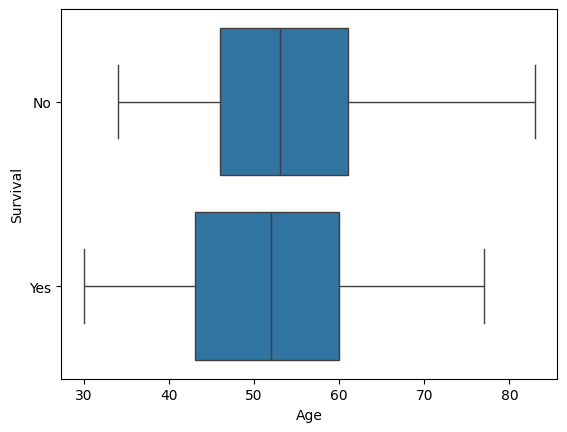

In [ ]:
sns.boxplot(x="Age",y="Survival",data=data)

***Heat Map(CATEGORRICAL CATEGORICAL)***

In [ ]:
data["Status"]=data["Survival"].map({"Yes":"OK","No":"Not OK"})
data.sample(5)

,Age,Year,Nodes,Survival,Status
188,55,69,22,Yes,OK
100,47,63,6,Yes,OK
272,66,68,0,Yes,OK
99,47,61,0,Yes,OK
278,67,65,0,Yes,OK


In [ ]:
pd.crosstab(data["Survival"],data["Status"])

Status,Not OK,OK
Survival,,
No,81,0
Yes,0,225


<Axes: xlabel='Status', ylabel='Survival'>

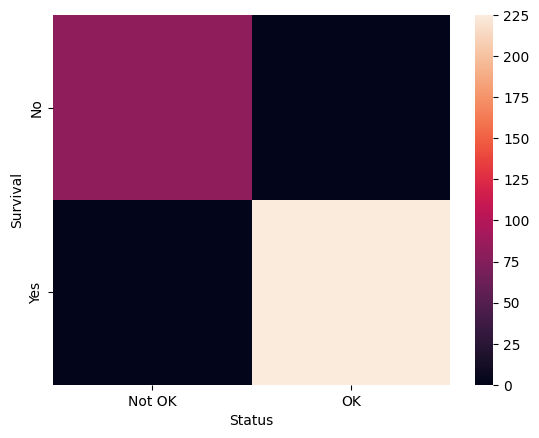

In [ ]:
sns.heatmap(pd.crosstab(data["Survival"],data["Status"]))